# Chapter 1: Introduction to Python for Medical Imaging 🐍📊

Welcome to the AIMI-Tutorial series! This first chapter is a quick introduction or refresher on the basic Python libraries we'll be using throughout this course:

- **NumPy** 🔢: The powerhouse for numerical operations
- **Matplotlib** 📈: The go-to library for data visualization

A solid understanding of these tools is crucial for medical image analysis. By the end of this chapter, you'll be able to manipulate arrays and create beautiful visualizations - essential skills for working with medical images!


In [7]:
# Import all required libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Configure matplotlib for inline display
%matplotlib inline
plt.style.use('default')  # Using default style for better medical image visualization


## 1.1 NumPy: The Foundation of Scientific Computing 🔢

NumPy (Numerical Python) is the fundamental package for numerical computation in Python. It provides:

- 📊 Powerful N-dimensional array objects
- 🚀 Fast mathematical operations
- 🧮 Tools for working with arrays
- 🎯 Broadcasting capabilities
- 🔄 Linear algebra operations

In medical imaging, we use NumPy arrays to represent and manipulate images. For example, a 2D grayscale image is just a 2D NumPy array where each value represents the pixel intensity!


In [8]:
# Creating a NumPy array
a = np.array([1, 2, 3, 4, 5])
print(f"1D Array: {a}")

# Creating a 2D array (like an image)
b = np.array([[1, 2, 3], [4, 5, 6]])
print(f"\n2D Array:\n{b}")

# Array attributes
print(f"\nArray shape: {b.shape}")
print(f"Array dimensions: {b.ndim}")
print(f"Array datatype: {b.dtype}")


1D Array: [1 2 3 4 5]

2D Array:
[[1 2 3]
 [4 5 6]]

Array shape: (2, 3)
Array dimensions: 2
Array datatype: int64


### Array Operations
NumPy allows you to perform element-wise operations on arrays.


In [9]:
c = np.array([10, 20, 30, 40, 50])

# Element-wise addition
d = a + c
print(f"a + c = {d}")

# Element-wise multiplication
e = a * 10
print(f"a * 10 = {e}")


a + c = [11 22 33 44 55]
a * 10 = [10 20 30 40 50]


### Medical Image Simulation 🧠

Let's create a more interesting example: a simulated brain-like structure using NumPy operations. This will show how we can use simple mathematical operations to create complex patterns similar to what we might see in medical images.


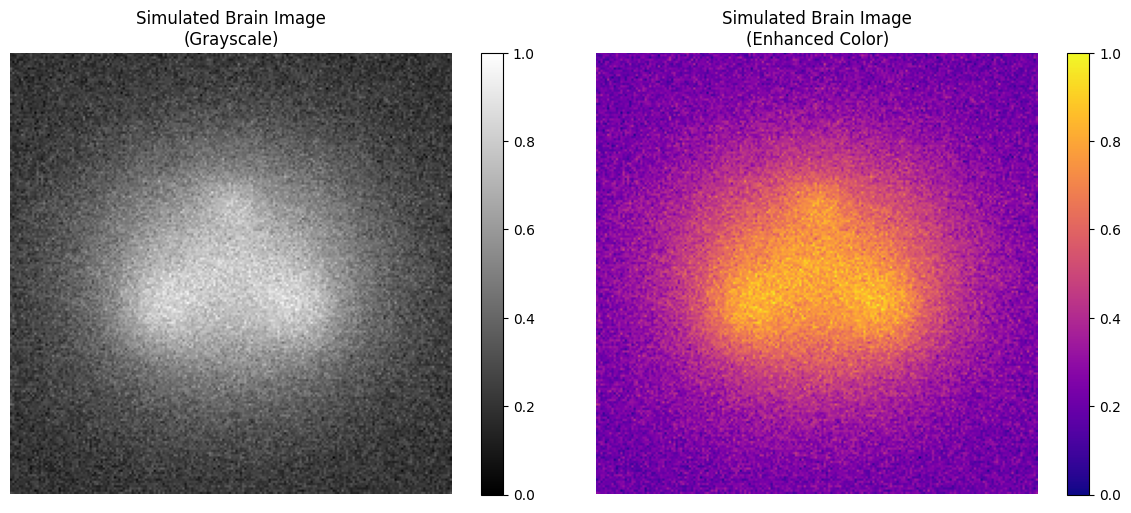


Image Statistics:
Shape: (200, 200)
Min value: 0.000
Max value: 1.000
Mean value: 0.380
Standard deviation: 0.182


In [10]:
def create_brain_like_image(size=100):
    """Create a simple brain-like structure using mathematical functions."""
    x, y = np.meshgrid(np.linspace(-3, 3, size), np.linspace(-3, 3, size))
    
    # Create basic elliptical shape
    brain = np.exp(-(x**2/4 + y**2/3))
    
    # Add some "tissue" variation
    noise = np.random.normal(0, 0.1, brain.shape)
    brain += noise
    
    # Add some "structures"
    brain += 0.3 * np.exp(-((x-1)**2/0.3 + (y-0.5)**2/0.3))  # Right hemisphere feature
    brain += 0.3 * np.exp(-((x+1)**2/0.3 + (y-0.5)**2/0.3))  # Left hemisphere feature
    brain += 0.2 * np.exp(-((x)**2/0.1 + (y+1)**2/0.1))      # Bottom feature
    
    # Normalize to [0, 1]
    brain = (brain - brain.min()) / (brain.max() - brain.min())
    
    return brain

# Create and display our simulated brain image
brain_image = create_brain_like_image(200)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Standard grayscale view
im1 = ax1.imshow(brain_image, cmap='gray')
ax1.set_title('Simulated Brain Image\n(Grayscale)')
ax1.axis('off')
plt.colorbar(im1, ax=ax1)

# Colorized view for better feature visibility
im2 = ax2.imshow(brain_image, cmap='plasma')
ax2.set_title('Simulated Brain Image\n(Enhanced Color)')
ax2.axis('off')
plt.colorbar(im2, ax=ax2)

plt.tight_layout()
plt.show()

# Show some basic image statistics
print("\nImage Statistics:")
print(f"Shape: {brain_image.shape}")
print(f"Min value: {brain_image.min():.3f}")
print(f"Max value: {brain_image.max():.3f}")
print(f"Mean value: {brain_image.mean():.3f}")
print(f"Standard deviation: {brain_image.std():.3f}")


### Medical Imaging Colormaps 🎨

In medical imaging, different colormaps can help highlight different features. Here's a demonstration of commonly used colormaps in medical image analysis:


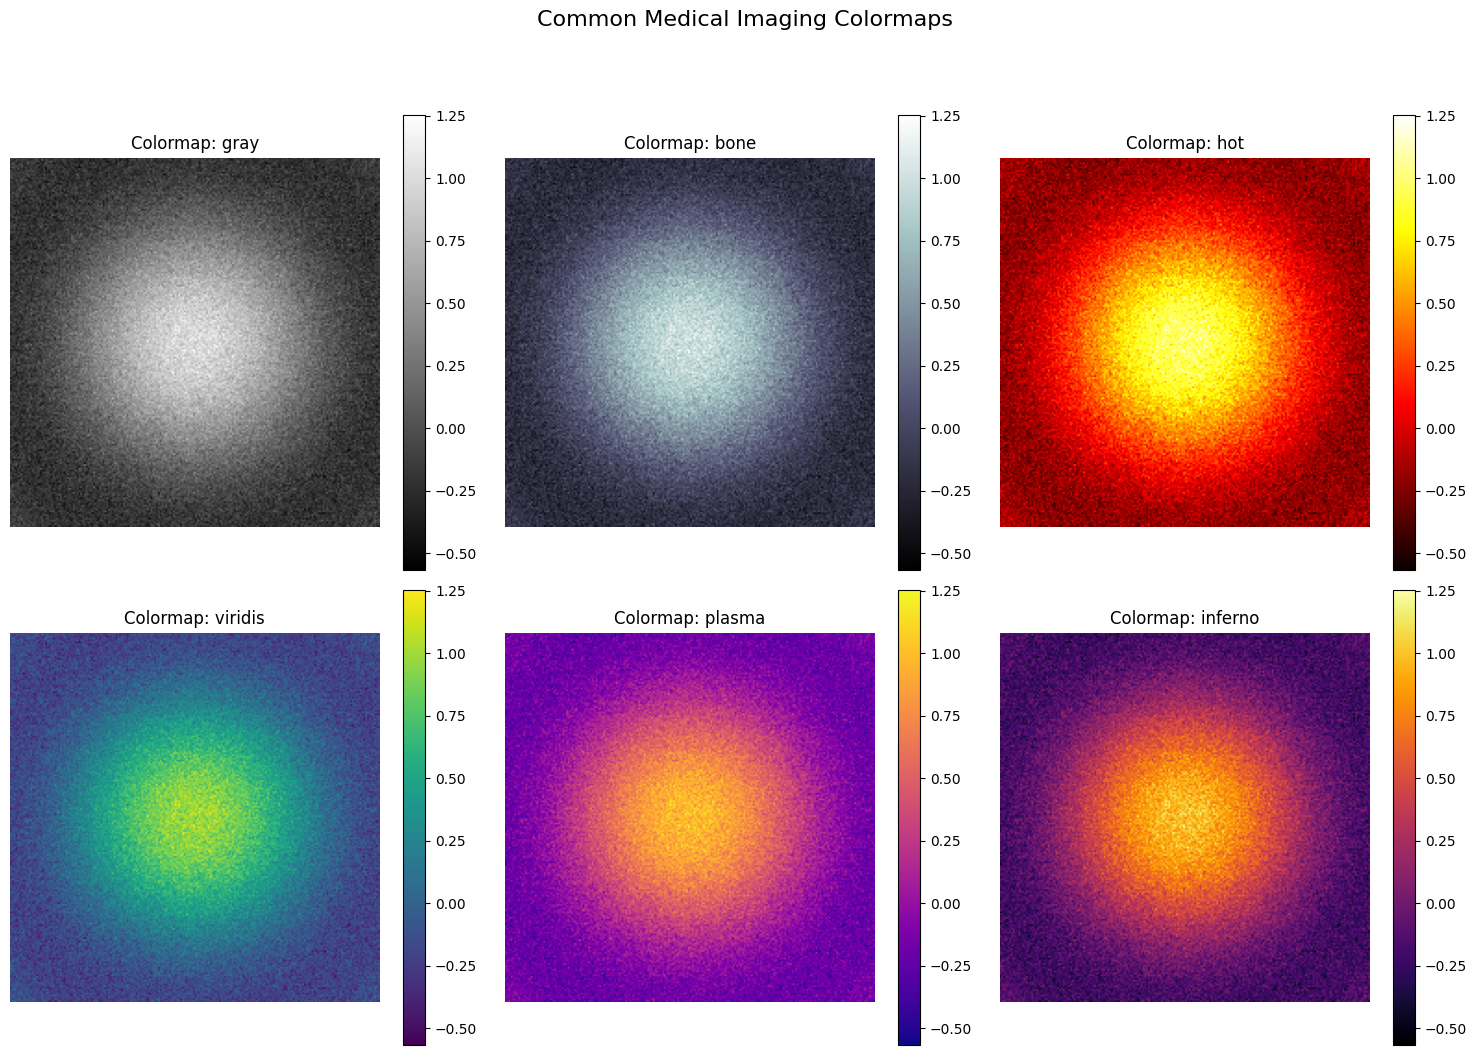

💡 Tips for choosing colormaps:
- 'gray': Standard for most medical images
- 'bone': Similar to gray but with a slight blue tint
- 'hot': Good for highlighting intensity differences
- 'viridis/plasma/inferno': Perceptually uniform and colorblind-friendly


In [11]:
# Create a figure with multiple colormaps
colormaps = ['gray', 'bone', 'hot', 'viridis', 'plasma', 'inferno']
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

# Create a more complex sample image
x, y = np.meshgrid(np.linspace(-4, 4, 200), np.linspace(-4, 4, 200))
r = np.sqrt(x**2 + y**2)
sample_image = np.sin(r)/r + 0.1*np.random.randn(200, 200)

# Display the image with different colormaps
for idx, cmap in enumerate(colormaps):
    im = axes[idx].imshow(sample_image, cmap=cmap)
    axes[idx].set_title(f'Colormap: {cmap}')
    axes[idx].axis('off')
    plt.colorbar(im, ax=axes[idx])

plt.suptitle('Common Medical Imaging Colormaps', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

print("💡 Tips for choosing colormaps:")
print("- 'gray': Standard for most medical images")
print("- 'bone': Similar to gray but with a slight blue tint")
print("- 'hot': Good for highlighting intensity differences")
print("- 'viridis/plasma/inferno': Perceptually uniform and colorblind-friendly")


### 3D Visualization 🔄

Medical imaging often deals with 3D data (like CT or MRI volumes). Here's a simple example of how we can create and visualize 3D data:


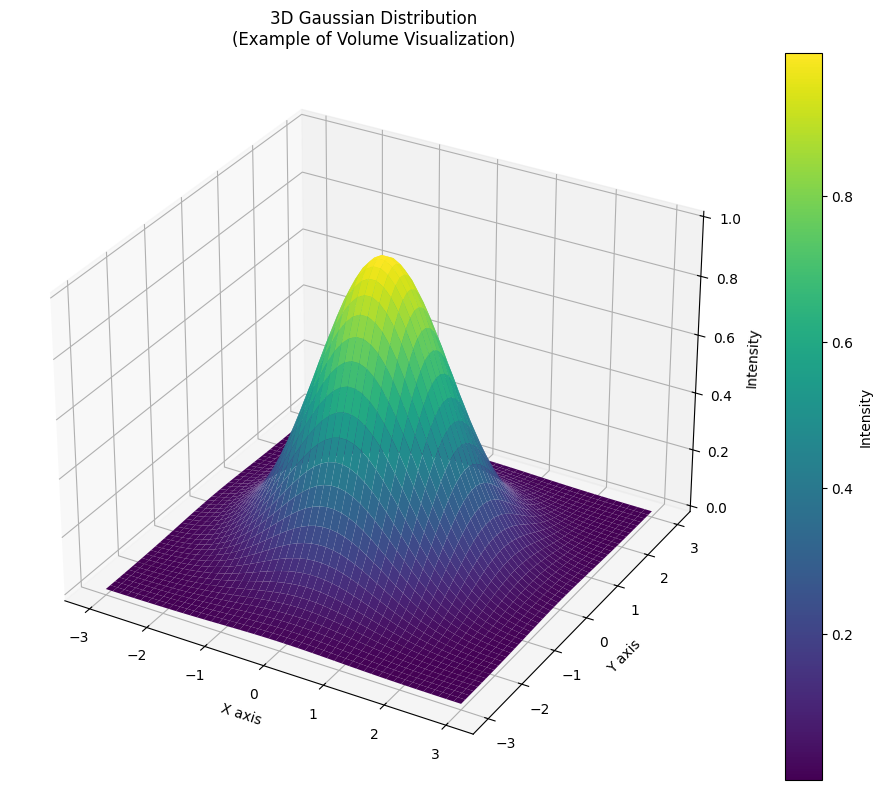

💡 Note: You can click and drag to rotate the 3D plot!


In [12]:
# Create a 3D Gaussian function
x = np.linspace(-3, 3, 50)
y = np.linspace(-3, 3, 50)
X, Y = np.meshgrid(x, y)
Z = np.exp(-(X**2 + Y**2)/2)

# Create 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
ax.set_title('3D Gaussian Distribution\n(Example of Volume Visualization)')

# Add labels
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Intensity')

# Add a color bar
plt.colorbar(surf, ax=ax, label='Intensity')

plt.tight_layout()
plt.show()

print("💡 Note: You can click and drag to rotate the 3D plot!")


## 🎉 End of Chapter 1: What We've Learned

Congratulations! You've completed the first chapter of our medical imaging journey. Let's recap what we've covered:

1. 🔢 **NumPy Basics**
   - Array creation and manipulation
   - Basic operations and indexing
   - Working with multi-dimensional arrays

2. 📊 **Matplotlib Visualization**
   - Basic plotting capabilities
   - Image display techniques
   - Different colormaps for medical imaging
   - 3D visualization

### 🚀 Next Steps

In the next chapter, we'll dive into real medical image formats and learn how to work with DICOM files. Get ready to apply these Python basics to actual medical data!

### 📚 Additional Resources

- [NumPy Documentation](https://numpy.org/doc/stable/) - Deep dive into array operations
- [Matplotlib Documentation](https://matplotlib.org/stable/contents.html) - More visualization techniques
- [Scientific Python Lectures](https://scipy-lectures.org/) - Comprehensive scientific Python tutorials

### 💡 Practice Ideas

1. Try creating different shapes using NumPy arrays
2. Experiment with other colormaps in Matplotlib
3. Modify the 3D visualization with different mathematical functions
4. Create your own "simulated medical image" using NumPy operations

Remember: The best way to learn is by experimenting with the code! 🧪
